In [27]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('turnstile_160618.txt')

In [29]:
df.columns = df.columns.str.strip() #strip whitespace

In [30]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,06/11/2016,00:00:00,REGULAR,5703420,1930887
1,A002,R051,02-00-00,59 ST,NQR456,BMT,06/11/2016,04:00:00,REGULAR,5703465,1930891
2,A002,R051,02-00-00,59 ST,NQR456,BMT,06/11/2016,08:00:00,REGULAR,5703487,1930933
3,A002,R051,02-00-00,59 ST,NQR456,BMT,06/11/2016,12:00:00,REGULAR,5703589,1931038
4,A002,R051,02-00-00,59 ST,NQR456,BMT,06/11/2016,16:00:00,REGULAR,5703880,1931107


In [31]:
df.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES', u'EXITS'],
      dtype='object')

## Cleaning

In [32]:
df['TIMESTAMP'] = pd.to_datetime((df.DATE + ' ' + df.TIME), format='%m/%d/%Y %H:%M:%S')

In [33]:
df['STATID'] = df.STATION + df.LINENAME

In [34]:
df = df.sort_values(['STATID', 'UNIT','SCP', 'TIMESTAMP'])

In [35]:
df['DIFFERENCE']=df.groupby(['STATID','UNIT','SCP'],as_index=False)['ENTRIES'].transform(pd.Series.diff)['ENTRIES']

In [36]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIMESTAMP,STATID,DIFFERENCE
29984,H007,R248,00-00-00,1 AV,L,BMT,06/11/2016,00:00:00,REGULAR,11184979,12200780,2016-06-11 00:00:00,1 AVL,NaN
29985,H007,R248,00-00-00,1 AV,L,BMT,06/11/2016,04:00:00,REGULAR,11185135,12201136,2016-06-11 04:00:00,1 AVL,156.0
29986,H007,R248,00-00-00,1 AV,L,BMT,06/11/2016,08:00:00,REGULAR,11185243,12201474,2016-06-11 08:00:00,1 AVL,108.0
29987,H007,R248,00-00-00,1 AV,L,BMT,06/11/2016,12:00:00,REGULAR,11185794,12202251,2016-06-11 12:00:00,1 AVL,551.0
29988,H007,R248,00-00-00,1 AV,L,BMT,06/11/2016,16:00:00,REGULAR,11186632,12203145,2016-06-11 16:00:00,1 AVL,838.0


# Playground

In [21]:
# plt.hist(df['TIMESTAMP']) #this doesn't work

In [10]:
# joel_ser = pd.Series(np.random.randn(100))

In [11]:
# joel_df = pd.DataFrame(joel_ser, columns=['my_bullshit'])

In [14]:
# joel_df.head()

In [15]:
# plt.hist(joel_df.my_bullshit)

In [39]:
from collections import Counter

In [40]:
Counter('Lauren')

Counter({'L': 1, 'a': 1, 'e': 1, 'n': 1, 'r': 1, 'u': 1})

In [53]:
M_dic = Counter("Mississippiaaa")

In [54]:
letters = [letter for letter in M_dic.keys()]

In [55]:
l_counts = [l_count for l_count in M_dic.values()]

<Container object of 5 artists>

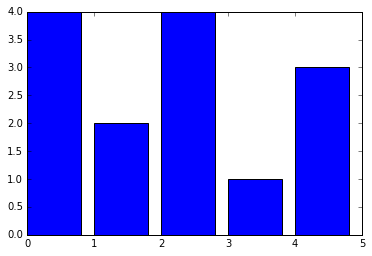

In [57]:
plt.bar(range(5), l_counts)

In [65]:
# station_dict = dict()
# stations = df['STATION'].unique().tolist()

# for station in stations:
#         sdf = df[df['STATION'] == station]
#         station_dict[station] = dict()
#         units = sdf['UNIT'].unique().tolist()
#         for unit in units:
#                 udf = sdf[sdf['UNIT'] == unit]
#                 station_dict[station][unit] = dict()
#                 days = udf['DATE'].unique().tolist()
#                 for day in days:
#                     ddf = udf[udf['DATE'] == day]
#                     station_dict[station][unit][day] = dict()
#                     intervals = ddf['TIME'].unique().tolist()
#                     for interval in intervals:
#                         idf = ddf[ddf['TIME'] == interval]
#                         station_dict[station][unit][day][interval] = idf[idf['TIME'] == interval]['ENTRIES'].iloc(0)

In [17]:
# type(df.DATE)
# type(df.DATE.values)
# df.DATE.head